In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns 

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.head(-5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1


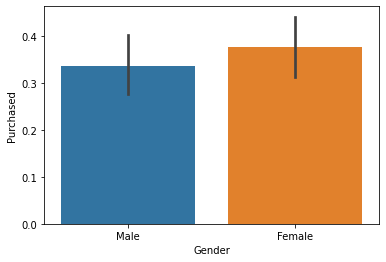

In [ ]:
sns.barplot(x=df.Gender,y=df.Purchased)

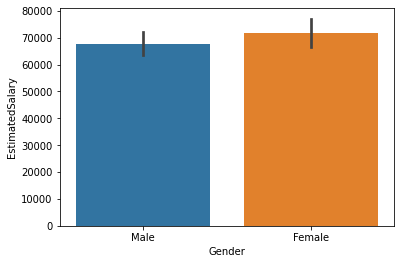

In [ ]:
sns.barplot(x=df.Gender,y=df.EstimatedSalary)

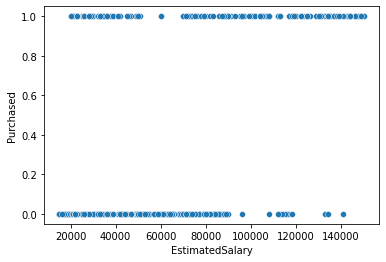

In [ ]:
sns.scatterplot(x=df.EstimatedSalary,y=df.Purchased)

In [ ]:
df[df['Purchased']==1].count()

User ID            143
Gender             143
Age                143
EstimatedSalary    143
Purchased          143
dtype: int64

In [ ]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [ ]:
X.shape

(400, 2)

In [ ]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy Score :",metrics.accuracy_score(y_test,y_pred))

Accuracy Score : 0.8583333333333333


In [ ]:
acc_rf = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.37728937728937717
Adjusted R^2: 0.36664475126013574
MAE: 0.14166666666666666
MSE: 0.14166666666666666
RMSE: 0.3763863263545405


In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[71,  7],
       [10, 32]])

In [ ]:
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

In [ ]:
error_df

,Actual,Predicted
218,0,1
191,0,0
117,0,0
50,0,0
348,0,0
...,...,...
157,0,0
325,0,0
224,0,0
240,1,1


# ***Testing***

# ***DecisionTreeClassifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_des=DecisionTreeClassifier()

In [ ]:
model_des.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_des=model_des.predict(X_test)

In [ ]:
print("Accuracy_Score",metrics.accuracy_score(y_test,y_pred_des))

Accuracy_Score 0.8833333333333333


In [ ]:
print("R^2 :",metrics.r2_score(y_test,y_pred_des))

R^2 : 0.4871794871794871


In [ ]:
error_des=pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred_des})